# ML Tips - KNeigborsClassifier

[Data Science Teacher Brandyn YouTube Channel](https://www.youtube.com/@data_science_teacher_brandyn)

[One on one time with Data Science Teacher Brandyn](https://www.datasimple.education/one-on-one-data-classes)


Follow Data Science Teacher Brandyn:

[On Facebook](https://www.facebook.com/datascienceteacherbrandyn/)

[On Linkedin](https://www.linkedin.com/company/87118408/?lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_view_base%3BbzacqELVQsWzYo4BJNigFw%3D%3D)

###[Ai Art Collections](https://www.datasimple.education/dataart/ai-art-collections)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter('ignore')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/brandynewanek/data/main/penguins.csv')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


# EDA

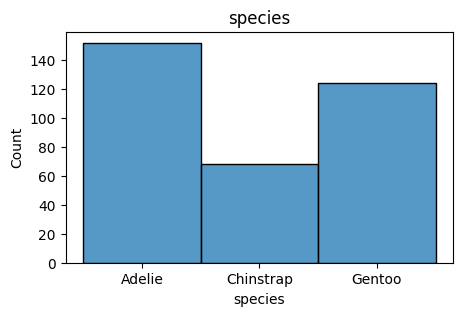

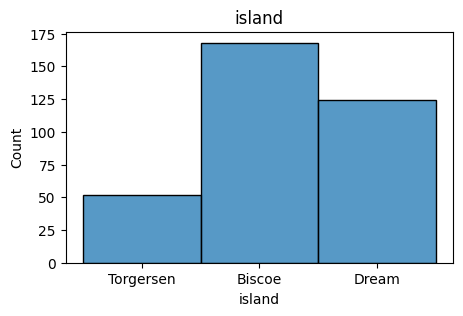

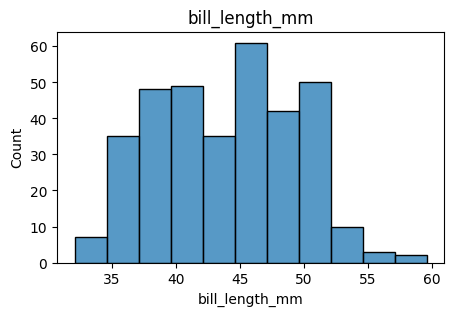

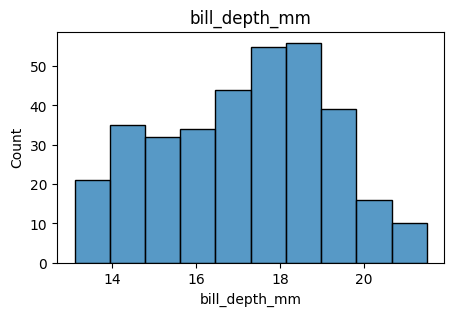

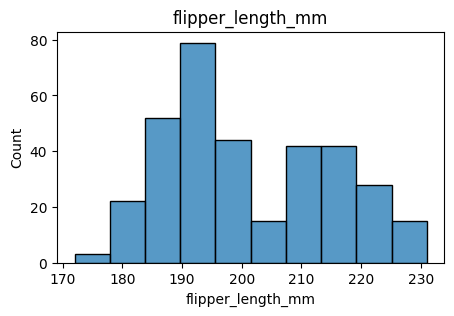

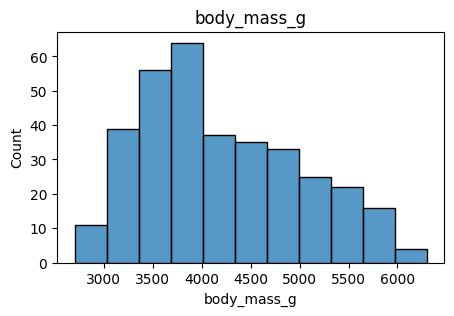

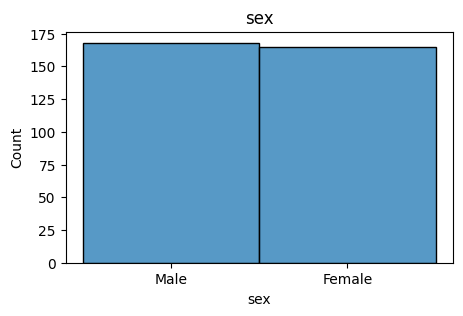

In [ ]:
for feat in df.columns:
  plt.figure(figsize=(5,3))
  sns.histplot(data=df, x=feat)
  plt.title(feat)
  plt.show()

# Preprocessing

## Handling Null Values

In [ ]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [ ]:
for feat in df.select_dtypes('number').columns:
  df[feat] = df[feat].fillna(df[feat].median())

In [ ]:
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])

In [ ]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

## One Hot Encoding

In [ ]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [ ]:
cat_feats = ['sex', 'species']

df = pd.get_dummies(df, columns=cat_feats)
df.shape

(344, 10)

In [ ]:
df.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_Female,sex_Male,species_Adelie,species_Chinstrap,species_Gentoo
0,Torgersen,39.10,18.7,181.0,3750.0,0,1,1,0,0
1,Torgersen,39.50,17.4,186.0,3800.0,1,0,1,0,0
2,Torgersen,40.30,18.0,195.0,3250.0,1,0,1,0,0
3,Torgersen,44.45,17.3,197.0,4050.0,0,1,1,0,0
4,Torgersen,36.70,19.3,193.0,3450.0,1,0,1,0,0


## Train Test Split

In [ ]:
df.columns

Index(['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex_Female', 'sex_Male', 'species_Adelie',
       'species_Chinstrap', 'species_Gentoo'],
      dtype='object')

In [ ]:
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex_Female', 'sex_Male', 'species_Adelie',
       'species_Chinstrap', 'species_Gentoo']
target = ['island']

In [ ]:
X = df[features]
y = df[target]

In [ ]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=.3, random_state=1)

## Standardize

In [ ]:
# std_scaler = StandardScaler().fit(X_tr)
# X_tr = std_scaler.transform(X_tr)
# X_ts = std_scaler.transform(X_ts)

# KNeighbors

In [ ]:
knn = KNeighborsClassifier().fit(X_tr, y_tr)
print('train accuracy', knn.score(X_tr, y_tr))
print('test accuracy', knn.score(X_ts, y_ts))

train accuracy 0.7666666666666667
test accuracy 0.6153846153846154


In [ ]:
clusters = np.arange(2,15)
train_scores = []
test_scores = []

for cluster in clusters:
  knn = KNeighborsClassifier(algorithm='auto', n_neighbors=cluster).fit(X_tr, y_tr)
  train_scores.append(knn.score(X_tr, y_tr))
  test_scores.append(knn.score(X_ts, y_ts))

dict_scores  = {'train score':train_scores,
                'test score':test_scores}

df_scores = pd.DataFrame(dict_scores, index=clusters)

In [ ]:
clusters[np.argmax(test_scores)]

5

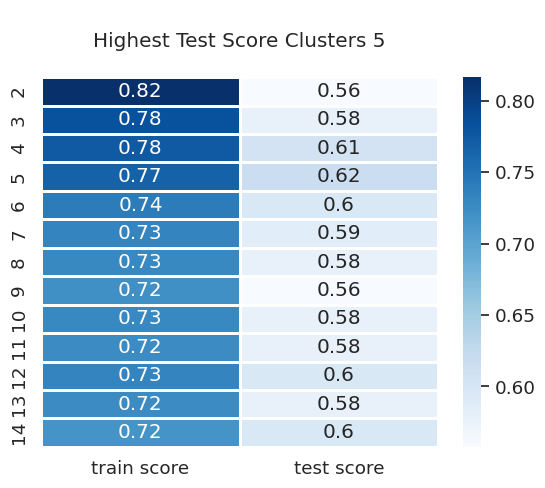

In [ ]:
sns.heatmap(df_scores, annot=True, cmap='Blues', lw=1)
plt.title(f'\nHighest Test Score Clusters {clusters[np.argmax(test_scores)]}\n')
plt.show()

## Visualizing Predictions



In [ ]:
knn = KNeighborsClassifier(n_neighbors=5).fit(X_tr, y_tr)
y_pred = knn.predict(X_ts)
knn_score_tr = knn.score(X_tr, y_tr)
knn_score_ts = knn.score(X_ts, y_ts)

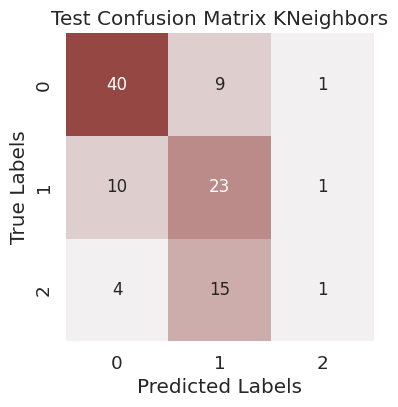

In [ ]:
conf_matrix = confusion_matrix(y_ts, y_pred)

plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)  # Adjust font size if needed
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=sns.light_palette('#954743'),
            square=True,
            xticklabels=True, yticklabels=True,
            cbar=False, annot_kws={'size': 12})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Test Confusion Matrix KNeighbors')
plt.show()

## KNeighbors with Bagging Ensemble

In [ ]:
bag = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=5),
                        random_state=42).fit(X_tr, y_tr)

y_pred = bag.predict(X_ts)
print('train accuracy', bag.score(X_tr, y_tr))
print('test accuracy', bag.score(X_ts, y_ts))

train accuracy 0.7875
test accuracy 0.5865384615384616


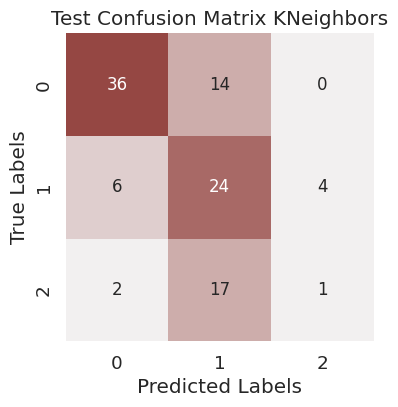

In [ ]:
conf_matrix = confusion_matrix(y_ts, y_pred)

plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)  # Adjust font size if needed
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=sns.light_palette('#954743'),
            square=True,
            xticklabels=True, yticklabels=True,
            cbar=False, annot_kws={'size': 12})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Test Confusion Matrix KNeighbors')
plt.show()

## Visualizing Centroids

In [ ]:
y_pred = pd.Series(bag.predict(X_ts))

test = pd.concat([X_ts.reset_index(), y_pred], axis=1)

test.head()

,index,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_Female,sex_Male,species_Adelie,species_Chinstrap,species_Gentoo,0
0,288,43.5,14.2,220.0,4700.0,1,0,0,0,1,Biscoe
1,78,36.2,16.1,187.0,3550.0,1,0,1,0,0,Torgersen
2,232,45.5,13.7,214.0,4650.0,1,0,0,0,1,Biscoe
3,192,49.0,19.5,210.0,3950.0,0,1,0,1,0,Dream
4,325,46.8,16.1,215.0,5500.0,0,1,0,0,1,Biscoe


In [ ]:
features = ['bill_length_mm','flipper_length_mm', 'body_mass_g']

In [ ]:
classes = test[0].value_counts().index
classes

Index(['Biscoe', 'Dream', 'Torgersen'], dtype='object')

In [ ]:
df_centroids = pd.DataFrame()

for c in classes:

  dict_centroids = {}

  for feat in features:
    mean = test[test[0]==c][feat].mean()
    dict_centroids[feat] = mean

  dict_centroids['predict class'] = c
  print(dict_centroids)

  centroids = pd.DataFrame(dict_centroids, index=[0])
  df_centroids = pd.concat([df_centroids, centroids], axis=0)

df_centroids

{'bill_length_mm': 45.695689655172416, 'flipper_length_mm': 210.70689655172413, 'body_mass_g': 4826.939655172414, 'predict class': 'Biscoe'}
{'bill_length_mm': 42.73047619047619, 'flipper_length_mm': 191.59047619047618, 'body_mass_g': 3593.3333333333335, 'predict class': 'Dream'}
{'bill_length_mm': 38.357894736842105, 'flipper_length_mm': 190.89473684210526, 'body_mass_g': 3505.2631578947367, 'predict class': 'Torgersen'}


,bill_length_mm,flipper_length_mm,body_mass_g,predict class
0,45.695690,210.706897,4826.939655,Biscoe
0,42.730476,191.590476,3593.333333,Dream
0,38.357895,190.894737,3505.263158,Torgersen


In [ ]:
colors = ['blue', 'red', 'green']

In [ ]:
fig = go.Figure()

# Add traces for each cluster
for i, label in enumerate(set(classes)):
    fig.add_trace(go.Scatter3d(
        x=test[test[0]==label]['bill_length_mm'],
        y=test[test[0]==label]['flipper_length_mm'],
        z=test[test[0]==label]['body_mass_g'],
        mode='markers',
        name=f"Cluster {label}",
        marker={'symbol': 'circle'}
    ))

for i, label in enumerate(set(classes)):
  # Add centroids as separate points
  fig.add_trace(go.Scatter3d(
      x=df_centroids[df_centroids['predict class']==label]['bill_length_mm'],
      y=df_centroids[df_centroids['predict class']==label]['flipper_length_mm'],
      z=df_centroids[df_centroids['predict class']==label]['body_mass_g'],
      mode='markers',
      name=f"Centroids {label}",
      marker={'symbol': 'circle-open', 'color': colors[i],
              'size':35}
  ))

fig.update_layout(
    scene=dict(
        xaxis_title='bill_length_mm',
        yaxis_title='flipper_length_mm',
        zaxis_title='body_mass_g',
    ),
    title='3D Scatter Plot with Centroids',
)
# Display the figure
fig.show()